In [1]:
import pandas as pd
pd.set_option('display.max_rows',500)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
mpl.rcParams['figure.figsize']=(16,9)
sns.set(style='darkgrid')

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser' #rendering for the browser. independent of type of the browser runs the code pop ups a new tab.

##  Explorative Data Analysis

In [2]:

df_plot=pd.read_csv(r'../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.head()

,date,India,Italy,US,Germany
0,2020-01-22,0,0,1,0
1,2020-01-23,0,0,1,0
2,2020-01-24,0,0,2,0
3,2020-01-25,0,0,2,0
4,2020-01-26,0,0,5,0


(10, 30000)

<Figure size 1152x648 with 0 Axes>

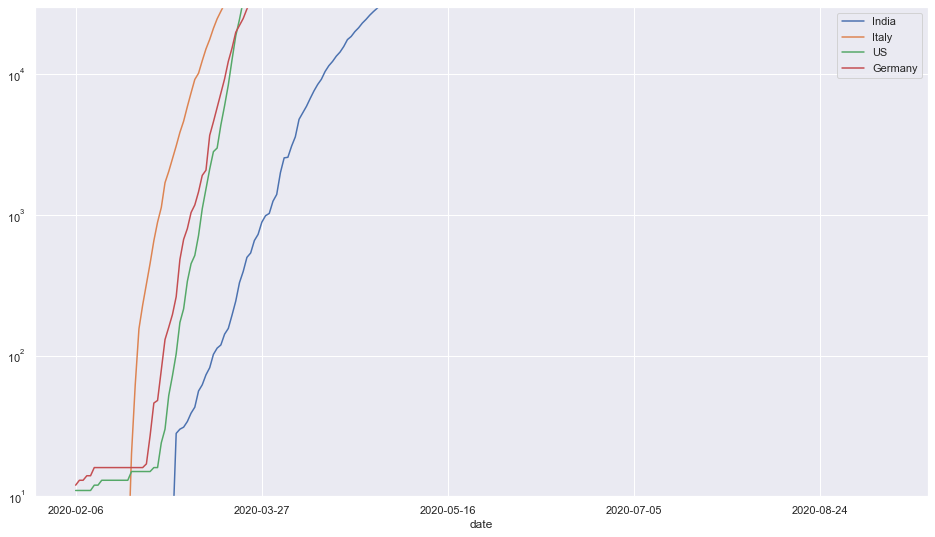

In [3]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
ax.set_yscale('log')
plt.ylim(10,30000)


## Plot.ly

In [4]:
fig=go.Figure()


In [5]:
country_list=['India','Germany','US','Italy']
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date, y=df_plot[each], mode="markers+lines",opacity=0.9,line_width=2,marker_size=4,name=each))
fig.update_layout(width=1000,height=800,xaxis_title='Time',yaxis_title='Confimed infected people',)
fig.update_yaxes(type="log", range=[1.1, 10.5])

fig.update_layout(xaxis_rangeslider_visible=True)
pio.show(fig)

In [6]:
import dash
import dash_core_components as dcc
import dash_html_components as html


In [7]:
app=dash.Dash()
app.layout=html.Div([html.Label('Multi-Select Country'),dcc.Dropdown(id='country_drop_down', options=[{'label':'Italy','value':'Italy'},{'label':'India','value':'India'},{'label':'Germany','value':'Germany'},{'label':'US','value':'US'}], value=['India','US'],multi=True),dcc.Graph(figure=fig, id='main_window_slope')])

In [8]:
from dash.dependencies import Input, Output
@app.callback(Output('main_window_slope','figure'),[Input('country_drop_down','value')])
def update_figure(country_list):
    traces=[]
    for each in country_list:
        traces.append(dict(x=df_plot.date,y=df_plot[each],mode='markers+lines',opacity=.9,line_width=2,marker_size=4,name=each))
    
    return {'data':traces, 'layout':dict(width=1280,height=720,xaxis_title='Time',yaxis_title='Confirmed infected people(log_scale)',
                                        xaxis={'tickangle':-45,'nticks':20,'tickfont':dict(size=14,color='#7f7f7f')},yaxis={'type':'log'
,'range':'[1.1,5.5]'})}

In [9]:
app.run_server(debug=True,use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
